# Metric Calculations for Breast Histopathology Images

In [2]:
## Load all the necessary packages

%matplotlib inline

import matplotlib.pyplot as plt
import skimage.transform
from skimage import data, io, filters
import numpy as np
from numpy import array
from skimage.transform import rescale, resize
from skimage.transform import resize
import os
import PIL
import pandas as pd
import imageio
import sewar

from matplotlib.pyplot import imread
import cv2

In [3]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [17]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[int(os.path.join(d,f)[50:-4])] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return res

In [18]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [19]:
## Load HR Images from directory
# print(len('./dataset used for metric evaluation/HR_0_imgs/'))
hr_normal_imgs = load_data("./dataset used for metric evaluation/HR_0_imgs/", ".png")

directory path:  ./dataset used for metric evaluation/HR_0_imgs/
directories:  ['./dataset used for metric evaluation/HR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ./dataset used for metric evaluation/HR_0_imgs/HR_1.png
Files Read:  200


In [20]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_normal_imgs = OrderedDict(sorted(hr_normal_imgs.items()))

In [21]:
## Function to display UMat images

def displayImages(img_arr):    
    width=8
    height=8
    rows = 3
    cols = 4
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("Image: "+str(i+1))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img_arr[i+1])
        plt.axis('off')
    fig.tight_layout()    
    plt.show()

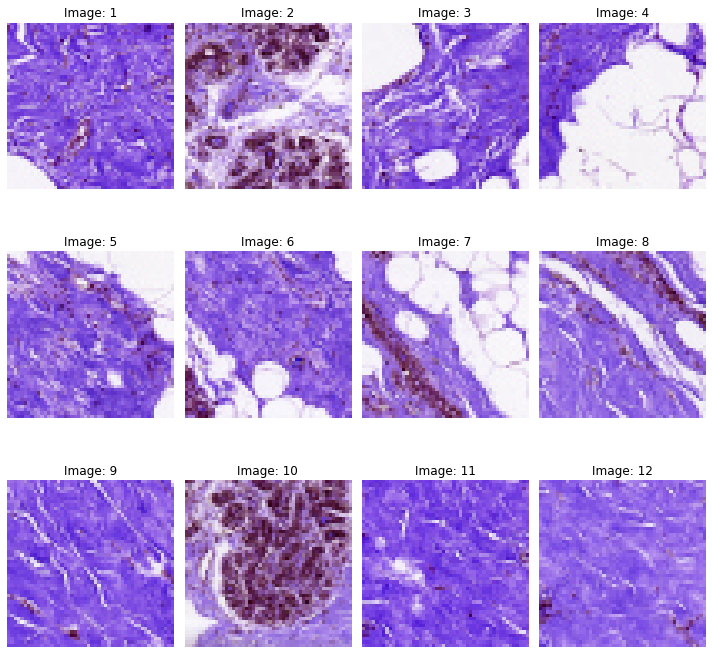

In [23]:
## Visualize few chest x-ray images

displayImages(srt_hr_normal_imgs)

In [24]:
## Load SR Images from directory

sr_normal_imgs = load_data("./dataset used for metric evaluation/SR_0_imgs/", ".png")

directory path:  ./dataset used for metric evaluation/SR_0_imgs/
directories:  ['./dataset used for metric evaluation/SR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ./dataset used for metric evaluation/SR_0_imgs/SR_1.png
Files Read:  200


In [25]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_normal_imgs = OrderedDict(sorted(sr_normal_imgs.items()))

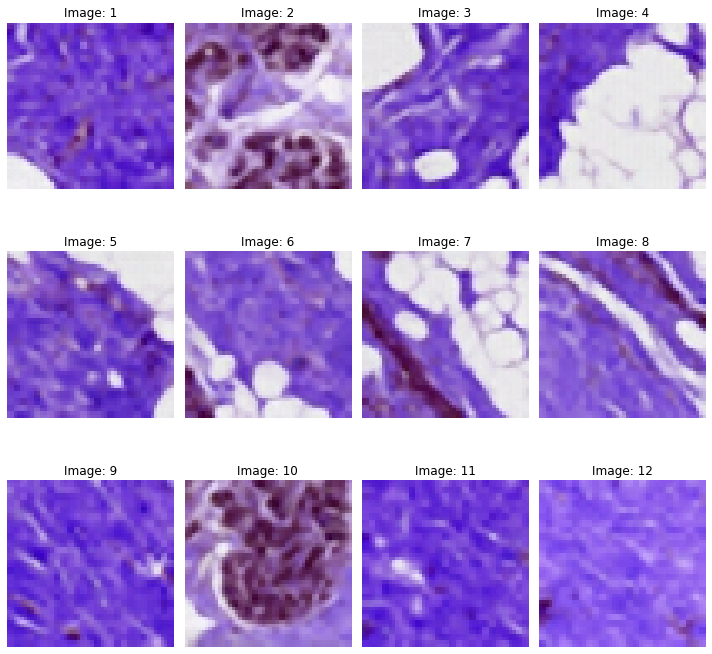

In [26]:
## Visualize few chest x-ray images

displayImages(srt_sr_normal_imgs)

## Computing Metrics for Chest X-Ray Normal Images

## Computing SSIM

In [27]:
## Compute SSIM for single image

ans = sewar.full_ref.ssim(srt_sr_normal_imgs[2],srt_hr_normal_imgs[2])[0]
print(ans)

0.8295148579203548


In [31]:
ssim_normal_arr = []
for i in range(1,201):
    ssim_normal_arr.append(sewar.full_ref.ssim(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i])[0])
    
## Display Results for starting 10 images

print(ssim_normal_arr[:10])

[0.6166567168984529, 0.8295148579203548, 0.7662651842767882, 0.837977598181889, 0.7445292247994381, 0.7437731608528972, 0.8746119162086231, 0.7935921808424492, 0.6791201526145102, 0.7822524938472556]


In [32]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
print(ssim_normal_mean, ssim_normal_std)

0.7456607125139763 0.07893555763640356


In [33]:
def displayResults(img_arr1, img_arr2,ssim_arr, metric, dim=(1, 3), figsize=(15, 5)):    
    width=8
    height=8
    rows = 5
    cols = 5
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        plt.figure(figsize=figsize)

        plt.subplot(dim[0], dim[1], 1)
        plt.imshow(img_arr1[i+1], interpolation='nearest', cmap='gray')
        plt.title(f"Super Resolution Image {i+1}")
        plt.axis('off')

        plt.subplot(dim[0], dim[1], 2)
        plt.imshow(img_arr2[i+1], interpolation='nearest', cmap='gray')
        plt.title(f"Origial Image {i+1}")
        plt.axis('off')
        
        plt.subplot(dim[0], dim[1], 3)
        plt.text(0.5, 0.5,f"{metric} {ssim_arr[i]}")
        plt.axis('off')
        
    fig.tight_layout()    
    plt.show()

<ipython-input-33-31d859d4810a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


<Figure size 720x720 with 0 Axes>

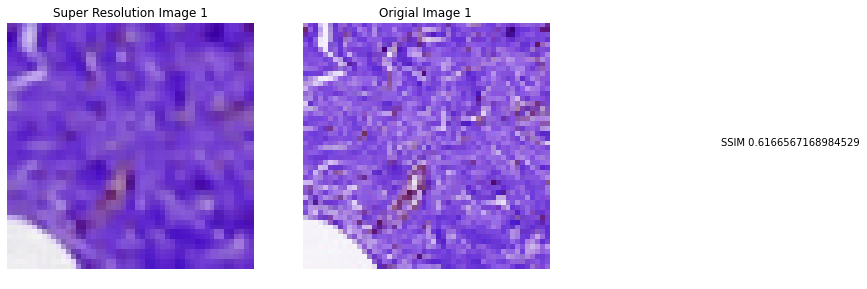

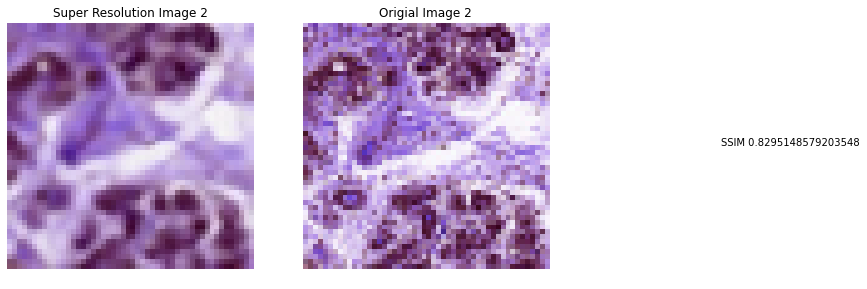

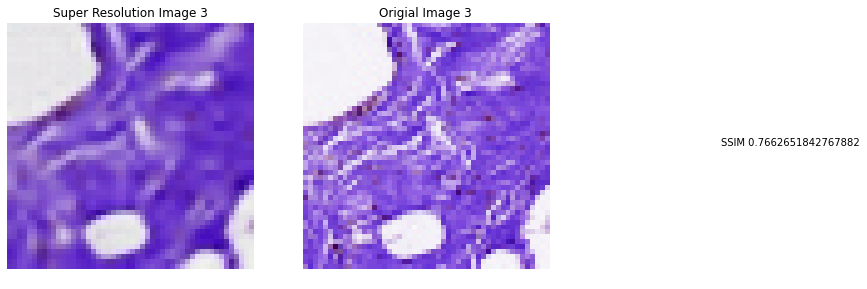

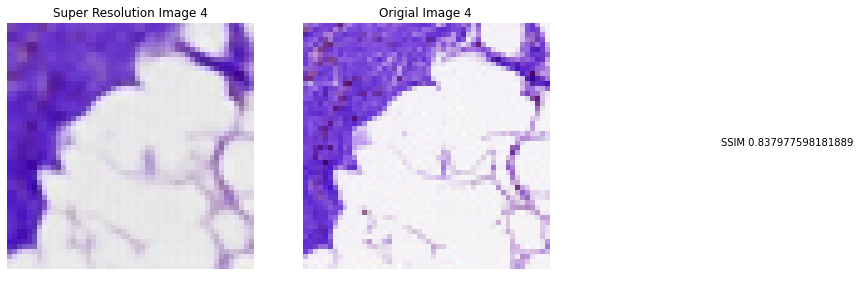

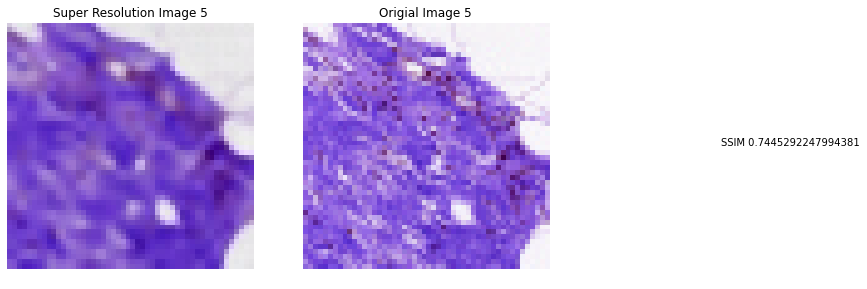

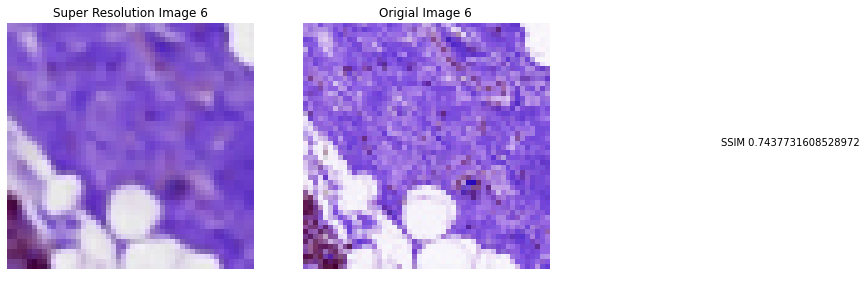

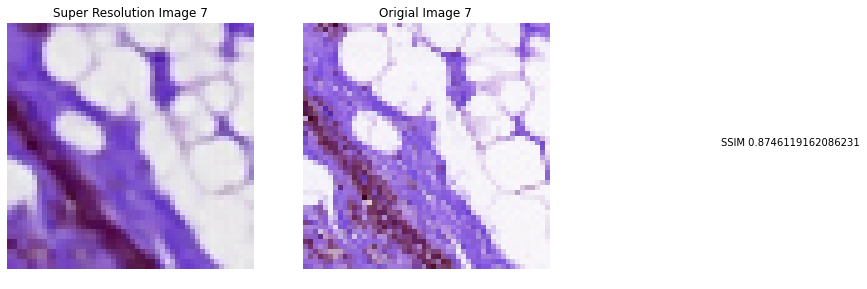

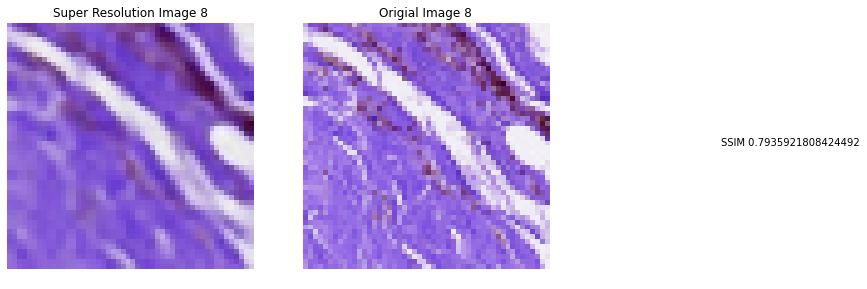

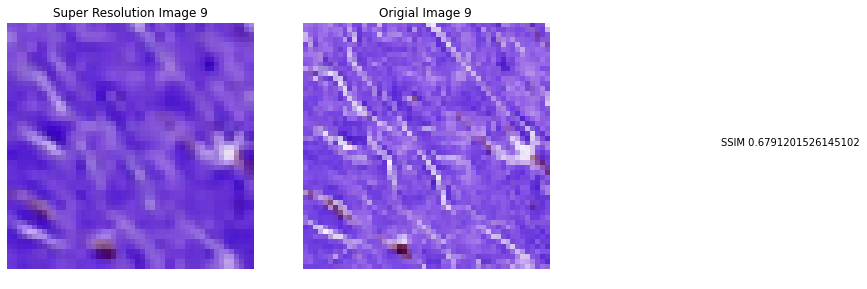

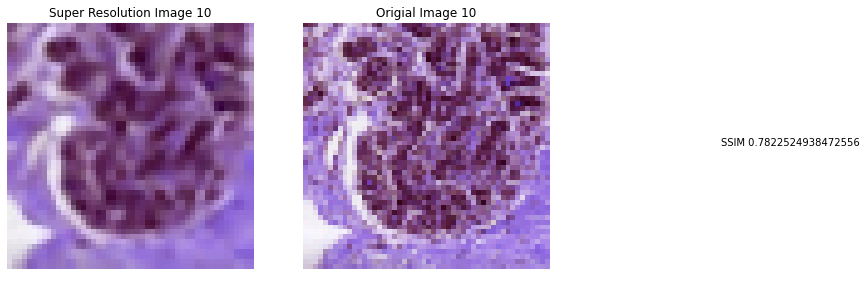

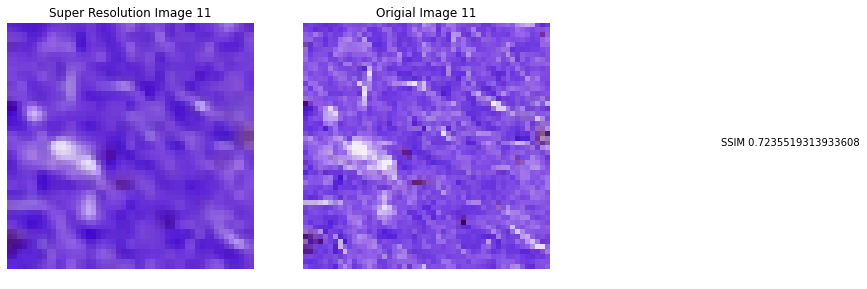

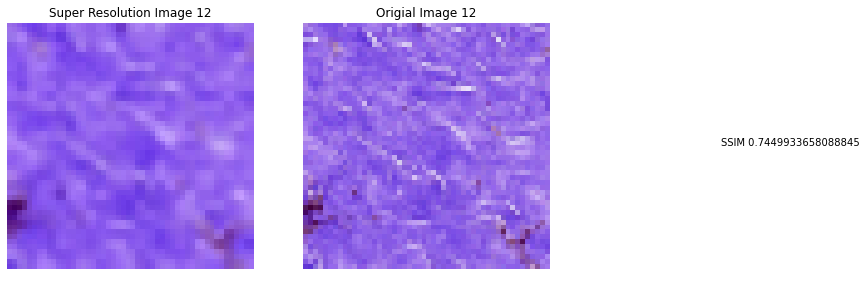

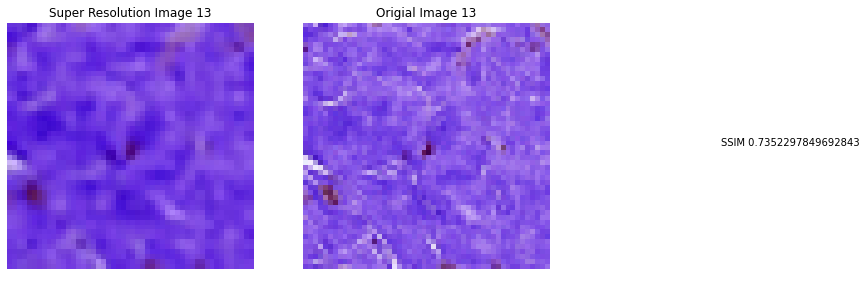

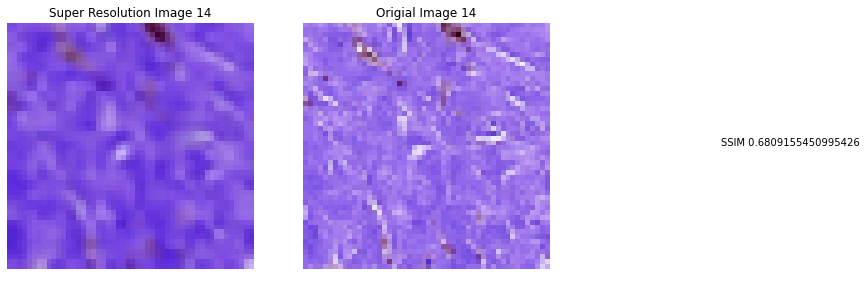

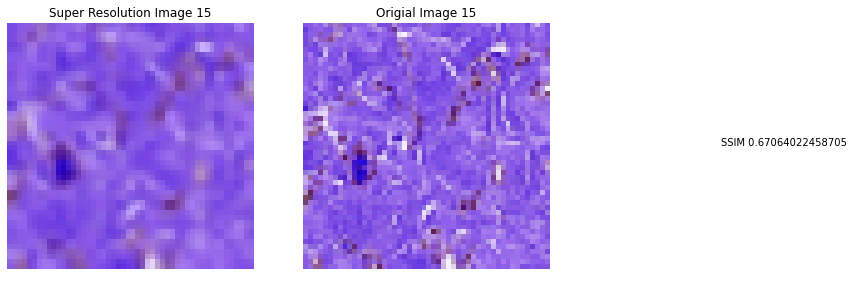

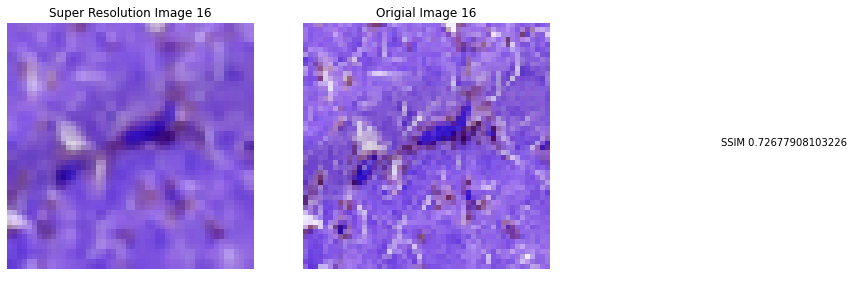

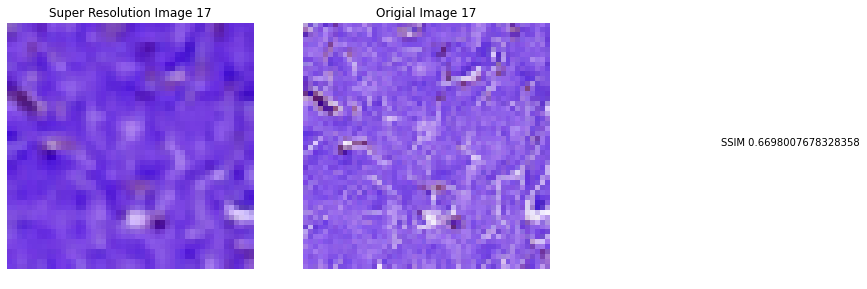

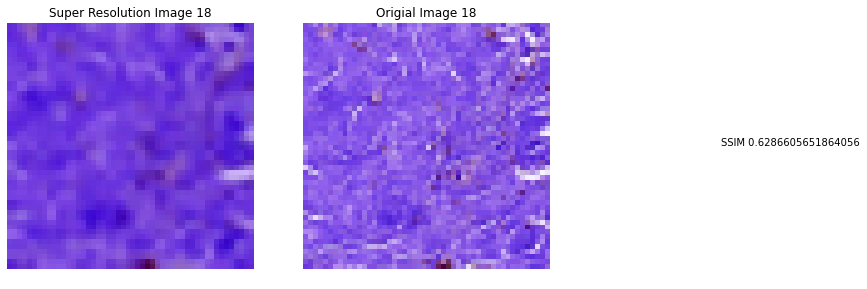

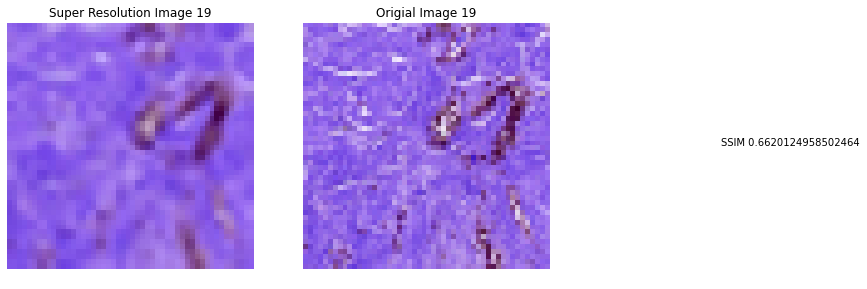

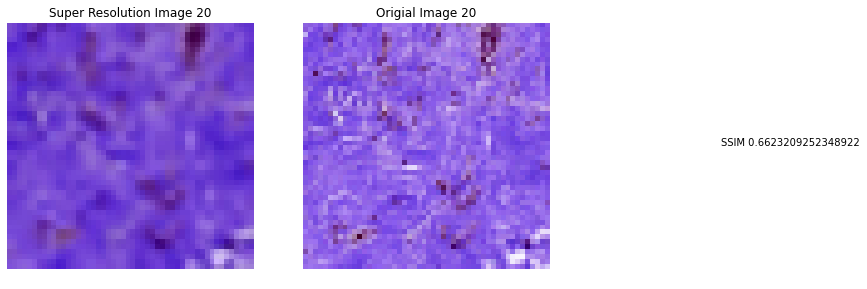

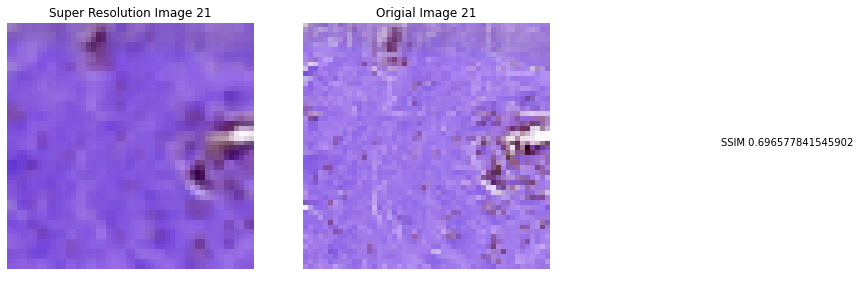

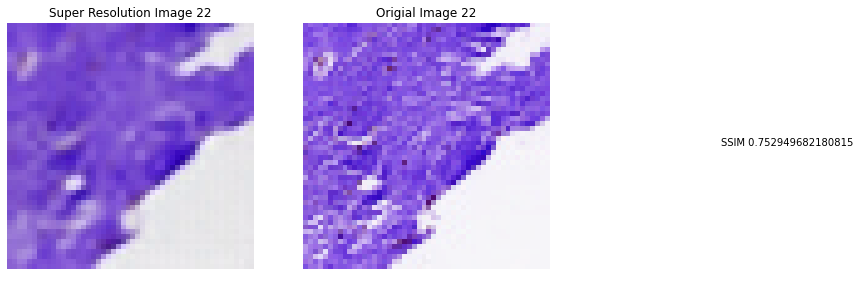

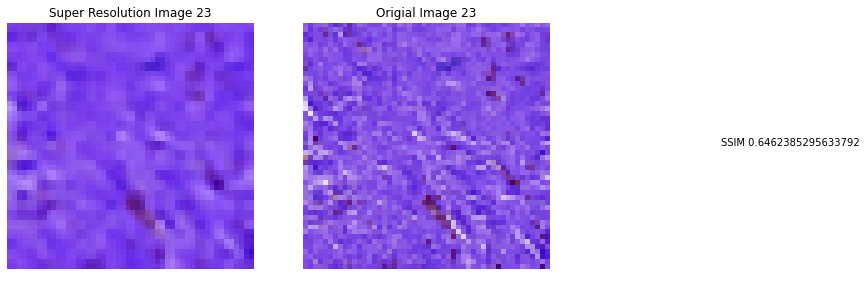

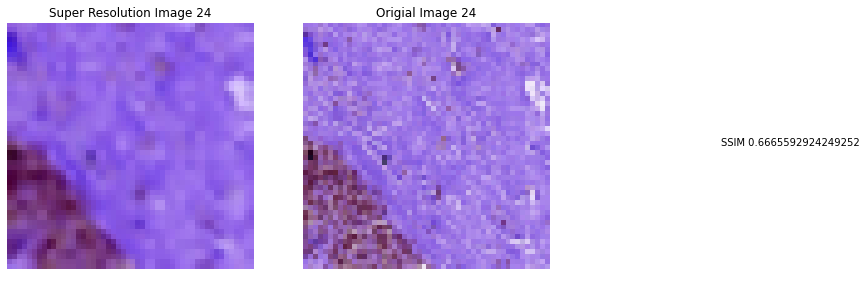

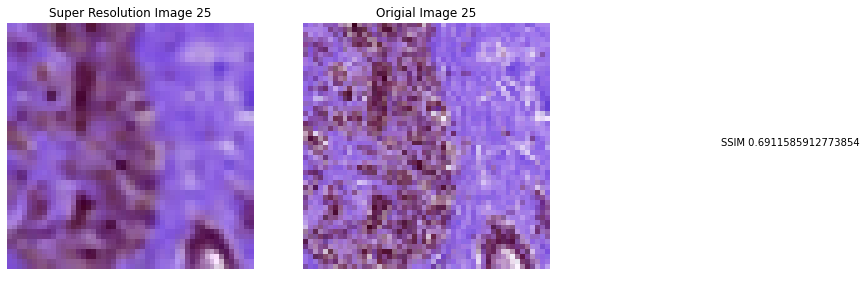

In [36]:
displayResults(srt_sr_normal_imgs, srt_hr_normal_imgs, ssim_normal_arr, "SSIM")

## Mean Absolute Error

In [37]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [38]:
print(MAE(srt_sr_normal_imgs[11], srt_hr_normal_imgs[11]))

0.0002666666666666667


In [40]:
mae_normal_arr=[]
for i in range(1, 201):
    mae_normal_arr.append(MAE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mae_normal_arr[:10])

[0.0002666666666666667, 0.0006666666666666666, 0.0008, 0.0012, 0.0006666666666666666, 0.0021333333333333334, 0.0009333333333333333, 0.0009333333333333333, 0.0, 0.0005333333333333334]


## Mean Percentage Error

In [41]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [43]:
print(MPE(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5]))

0.06666666666666667


In [44]:
mpe_normal_arr=[]
for i in range(1, 201):
    mpe_normal_arr.append(MPE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mpe_normal_arr[:10])

[0.02666666666666667, 0.06666666666666667, 0.08, 0.12, 0.06666666666666667, 0.21333333333333335, 0.09333333333333334, 0.09333333333333334, 0.0, 0.05333333333333334]


### Mean Square Error

In [45]:
ans = sewar.full_ref.mse(srt_sr_normal_imgs[21], srt_hr_normal_imgs[21])
print(ans, type(ans))

803.3413333333333 <class 'numpy.float64'>


In [46]:
mse_normal_arr = []
for i in range(1,201):
    mse_normal_arr.append(sewar.full_ref.mse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[908.8353333333333, 668.7929333333333, 764.6768, 420.96866666666665, 710.3438666666667, 512.698, 731.2676, 571.5478666666667, 800.0881333333333, 660.9117333333334]


In [47]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  699.5786646666666  std:  273.93206254580275


### Root Mean Square Error

In [49]:
ans = sewar.full_ref.rmse(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

25.861031173047476 <class 'numpy.float64'>


In [50]:
rmse_normal_arr = []
for i in range(1,201):
    rmse_normal_arr.append(sewar.full_ref.rmse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[30.146895915389585, 25.861031173047476, 27.652790094310554, 20.51752096786224, 26.65227695088483, 22.64283551148133, 27.041959988136956, 23.90706729539754, 28.285829196495783, 25.708203619337805]


In [51]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  25.961887650424178  std:  5.055596334105333


### PSNR

In [52]:
ans = sewar.full_ref.psnr(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

19.87788685298423 <class 'numpy.float64'>


In [53]:
psnr_normal_arr = []
for i in range(1,201):
    psnr_normal_arr.append(sewar.full_ref.psnr(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[18.54595157847137, 19.87788685298423, 19.296024468066435, 21.888305890231727, 19.61611725890322, 21.032187375774193, 19.49004029140547, 20.560277528055906, 19.099425317357998, 19.92936898789146]


In [54]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  20.009855584545253  std:  1.70738193596467


### Multi-Scale Structural Similarity Index (MS-SSIM)

In [55]:
ans = sewar.full_ref.msssim(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5])
print(ans, type(ans))

(0.940986653694245+0j) <class 'numpy.complex128'>


In [56]:
msssim_normal_arr = []
for i in range(1,201):
    msssim_normal_arr.append(sewar.full_ref.msssim(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.889282022065936, 0.9657546818118337, 0.9474174074872204, 0.9746335683117143, 0.940986653694245, 0.936862500006881, 0.9744497151250104, 0.9573126288049084, 0.9135874138829309, 0.9451984979614825]


In [57]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9378971143137576  std:  0.025675793215563642


### Spatial Corelation Coefficient (SCC)

In [58]:
ans = sewar.full_ref.scc(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.40173933212050567 <class 'numpy.float64'>


In [59]:
scc_normal_arr = []
for i in range(1,201):
    scc_normal_arr.append(sewar.full_ref.scc(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.3291380635044698, 0.40173933212050567, 0.44658077627117526, 0.48575184017266804, 0.37022966459400025, 0.4327560905302334, 0.5355154344264605, 0.4541766847910317, 0.33164955688078984, 0.4299700193063308]


In [60]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.40225203496962025  std:  0.09007214789974816


### Pixel Based Visual Information Fidelity (vif-p)

In [61]:
ans = sewar.full_ref.vifp(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.3067855302183696 <class 'numpy.float64'>


In [62]:
vifp_normal_arr = []
for i in range(1,201):
    vifp_normal_arr.append(sewar.full_ref.vifp(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.1980517513608834, 0.3067855302183696, 0.27233117587916383, 0.36893812255011266, 0.2578835228757961, 0.28775746254485496, 0.3793170721638151, 0.3091717271540949, 0.2033613851929845, 0.26314437828757636]


In [63]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.2758548797150903  std:  0.0529420567833585


### Visualizing Metrics for Normal Images

In [65]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP Metrics Results/normal/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

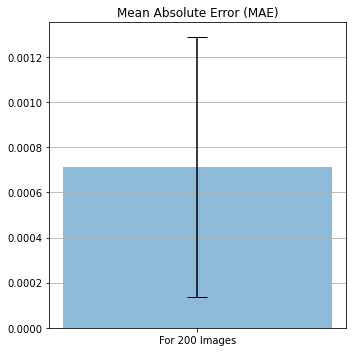

In [66]:
error_barplot(mae_normal_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

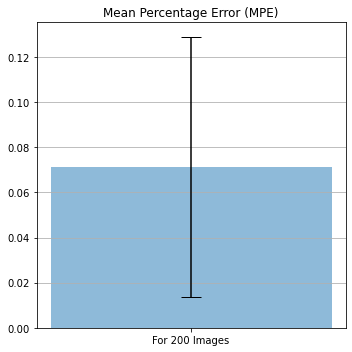

In [67]:
error_barplot(mpe_normal_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

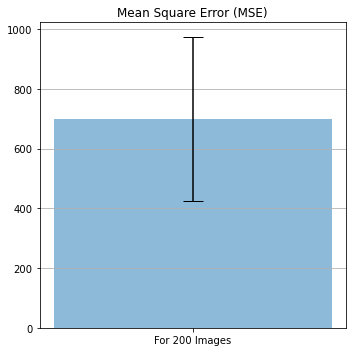

In [68]:
error_barplot(mse_normal_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

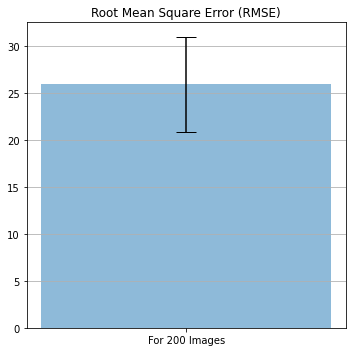

In [69]:
error_barplot(rmse_normal_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

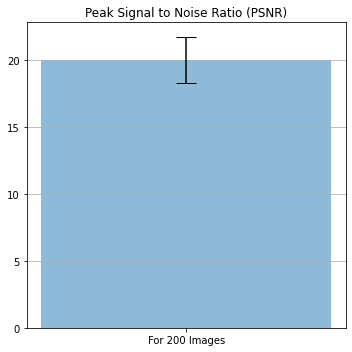

In [70]:
error_barplot(psnr_normal_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

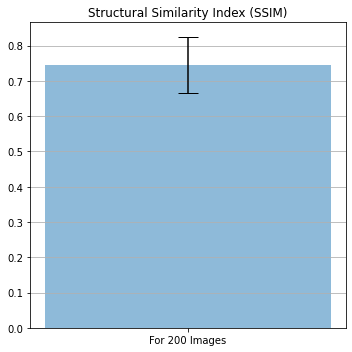

In [71]:
error_barplot(ssim_normal_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

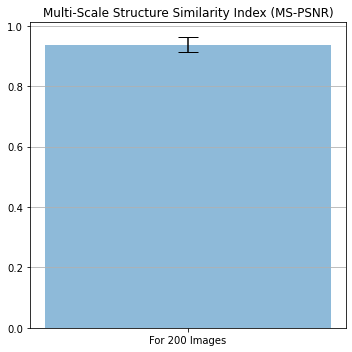

In [72]:
error_barplot(msssim_normal_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

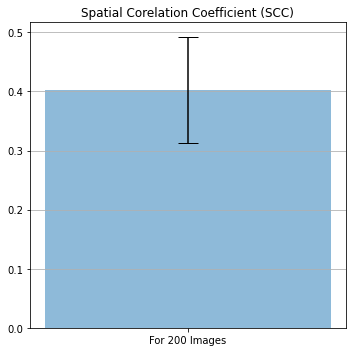

In [73]:
error_barplot(scc_normal_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

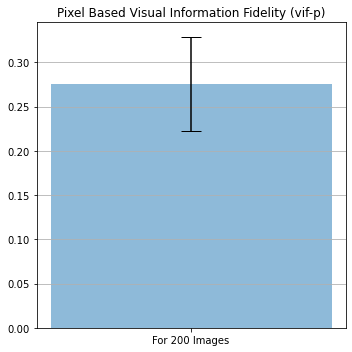

In [74]:
error_barplot(vifp_normal_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

## Scatter Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

In [75]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})

In [76]:
metric_dict = {'Images': [i for i in range(1,201)],
            'MAE' : mae_normal_arr,
            'MPE' : mpe_normal_arr,
            'MSE' : mse_normal_arr,
            'RMSE' : rmse_normal_arr,
            'PSNR' : psnr_normal_arr,
            'SSIM' : ssim_normal_arr,
            'MSSSIM' : msssim_normal_arr,
            'SCC' : scc_normal_arr,
            'VIFP' : vifp_normal_arr
         }
metric_df = pd.DataFrame(metric_dict)

In [77]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP Metrics Results/normal/scatter/{file_name}.png")

In [78]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP Metrics Results/normal/regression/{file_name}.png")

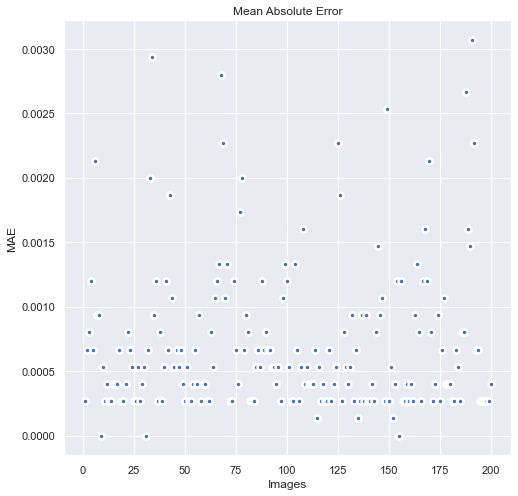

In [79]:
getScatterPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

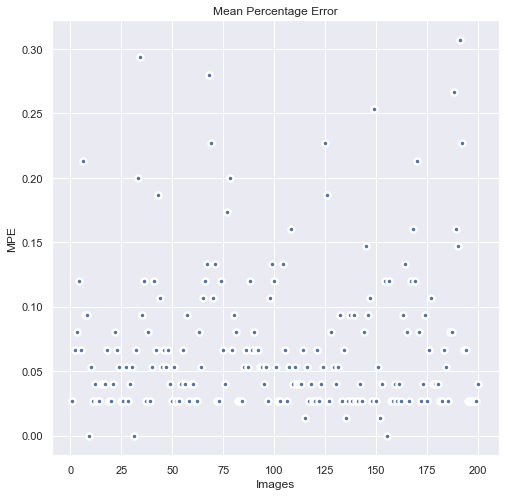

In [80]:
getScatterPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

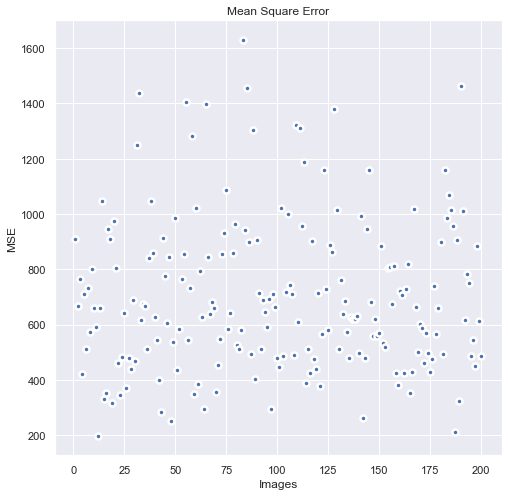

In [81]:
getScatterPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

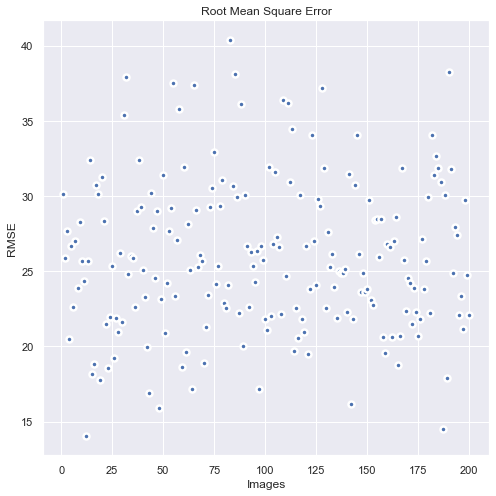

In [82]:
getScatterPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

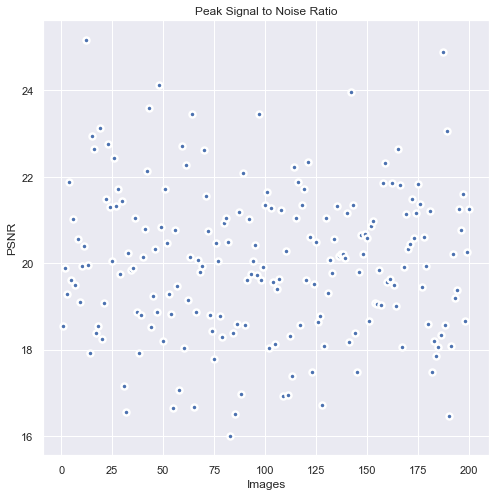

In [83]:
getScatterPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

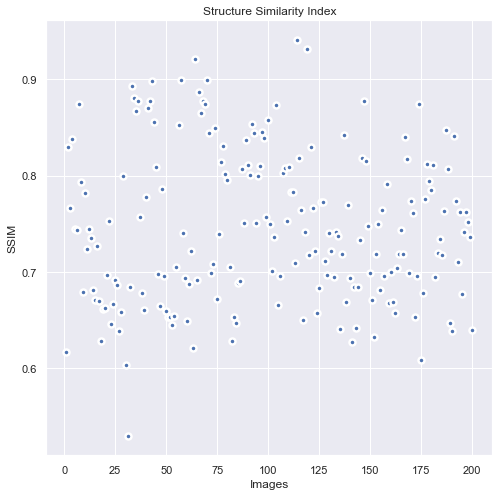

In [84]:
getScatterPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

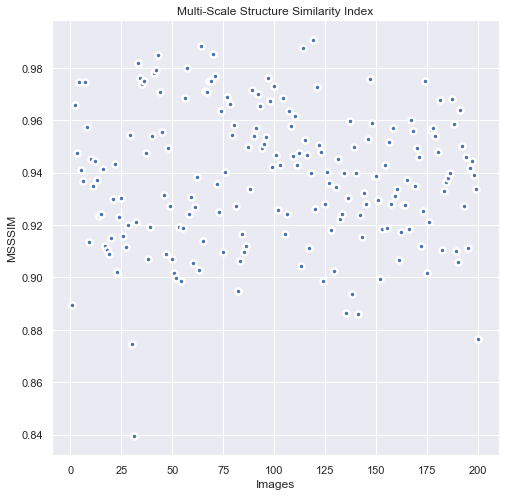

In [85]:
getScatterPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

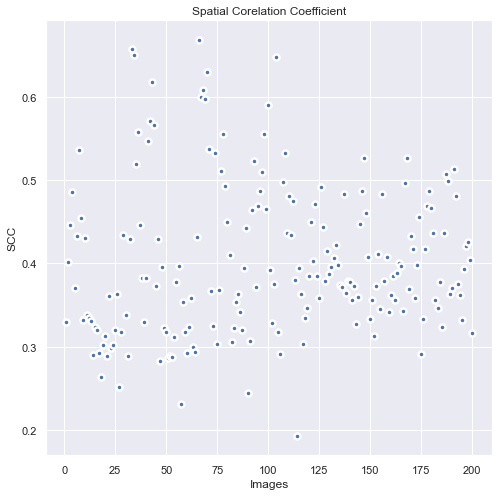

In [86]:
getScatterPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

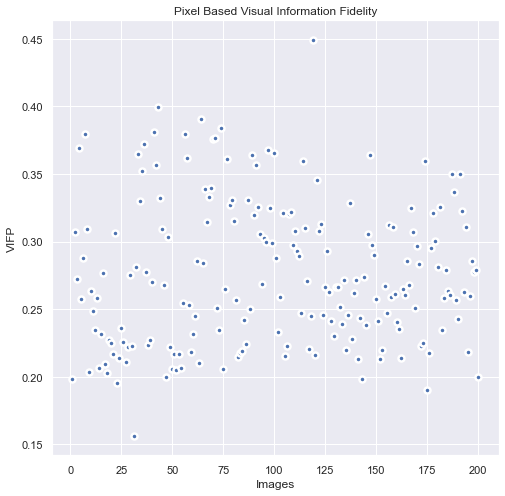

In [87]:
getScatterPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC and VIF-P

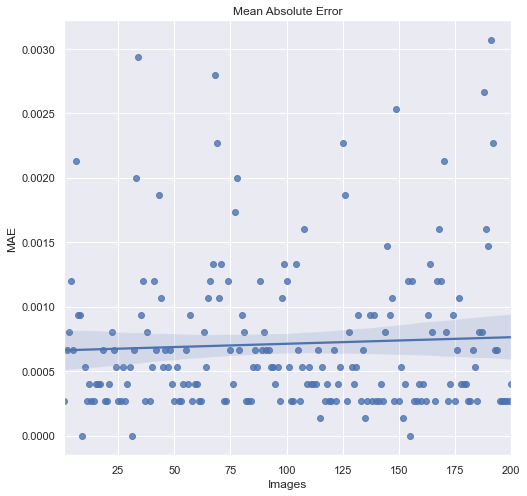

In [88]:
RegPlot(metric_df.MAE, metric_df, 'Mean Absolute Error', 'mae_scatter')

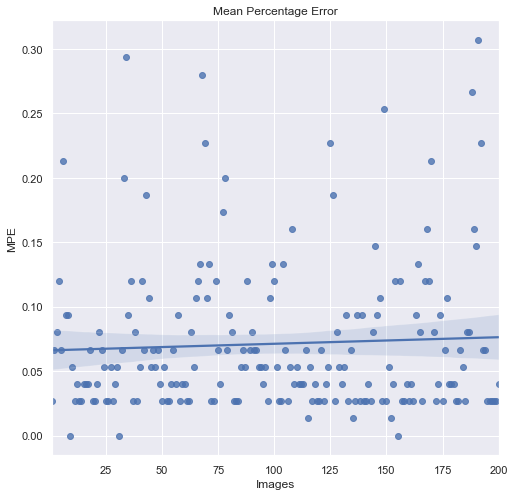

In [89]:
RegPlot(metric_df.MPE, metric_df, title='Mean Percentage Error', file_name='mpe_scatter')

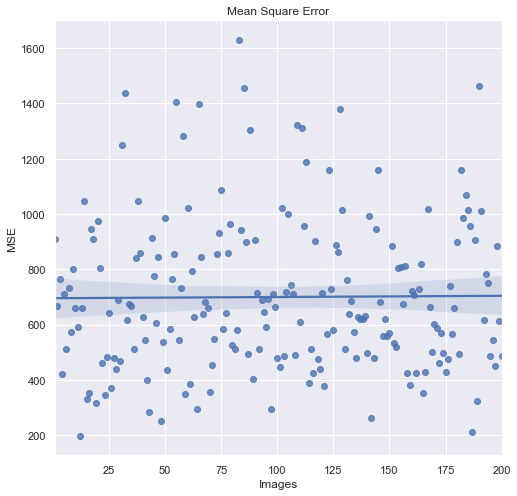

In [90]:
RegPlot(metric_df.MSE, metric_df, title='Mean Square Error', file_name='mse_scatter')

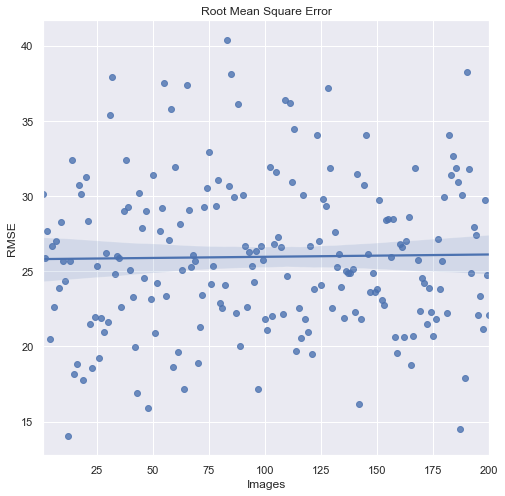

In [91]:
RegPlot(metric_df.RMSE, metric_df, title='Root Mean Square Error', file_name='rmse_scatter')

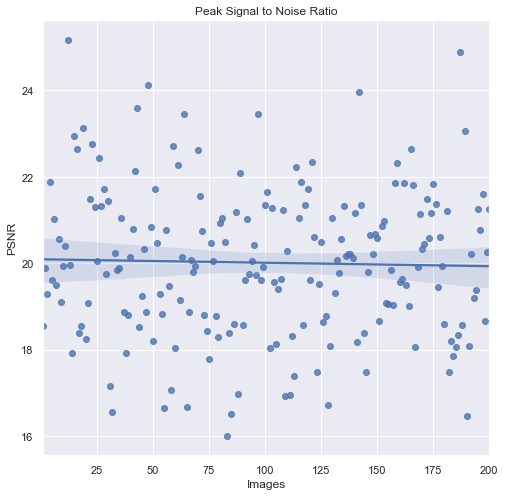

In [92]:
RegPlot(metric_df.PSNR, metric_df, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

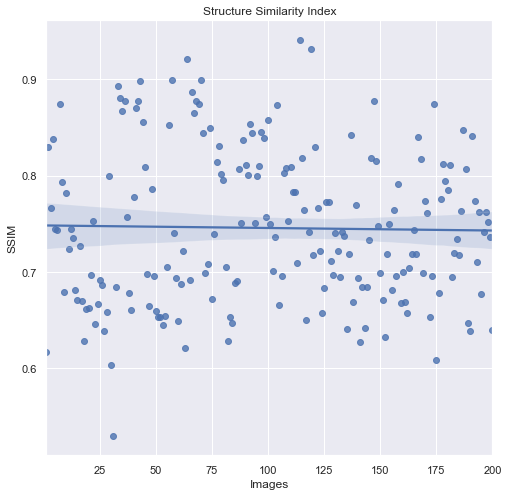

In [93]:
RegPlot(metric_df.SSIM, metric_df, title='Structure Similarity Index', file_name='ssim_scatter')

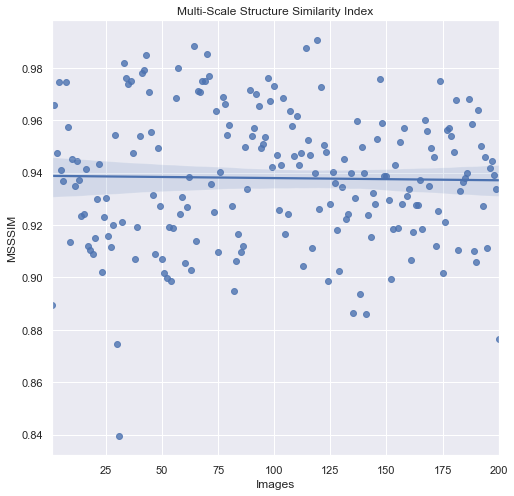

In [94]:
RegPlot(metric_df.MSSSIM, metric_df, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

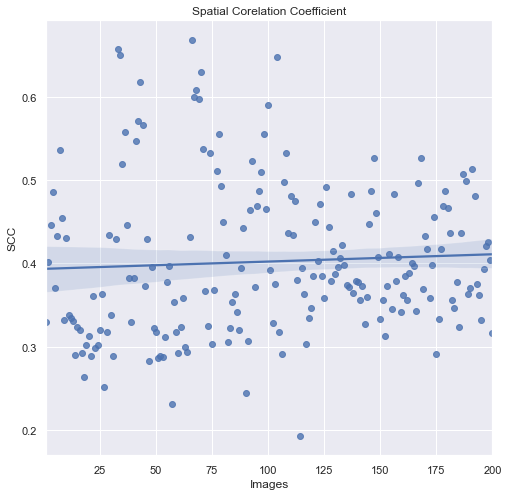

In [95]:
RegPlot(metric_df.SCC, metric_df, title='Spatial Corelation Coefficient', file_name='scc_scatter')

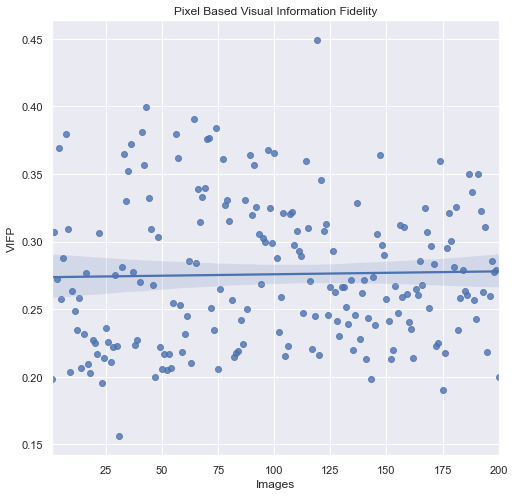

In [96]:
RegPlot(metric_df.VIFP, metric_df, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

## Metric Calculations for Diseased Images

In [26]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[int(os.path.join(d,f)[50:-4])] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return res

In [100]:
## Load HR Images from directory
# print(len('./dataset used for metric/HR_PNEUMONIA_imgs/'))
hr_pneumonia_imgs = load_data("./dataset used for metric evaluation/HR_1_imgs/", ".png")

directory path:  ./dataset used for metric evaluation/HR_1_imgs/
directories:  ['./dataset used for metric evaluation/HR_1_imgs/']
list of files:  200
list of files path:  200 file path:  ./dataset used for metric evaluation/HR_1_imgs/HR_1.png
Files Read:  200


In [101]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_pneumonia_imgs = OrderedDict(sorted(hr_pneumonia_imgs.items()))

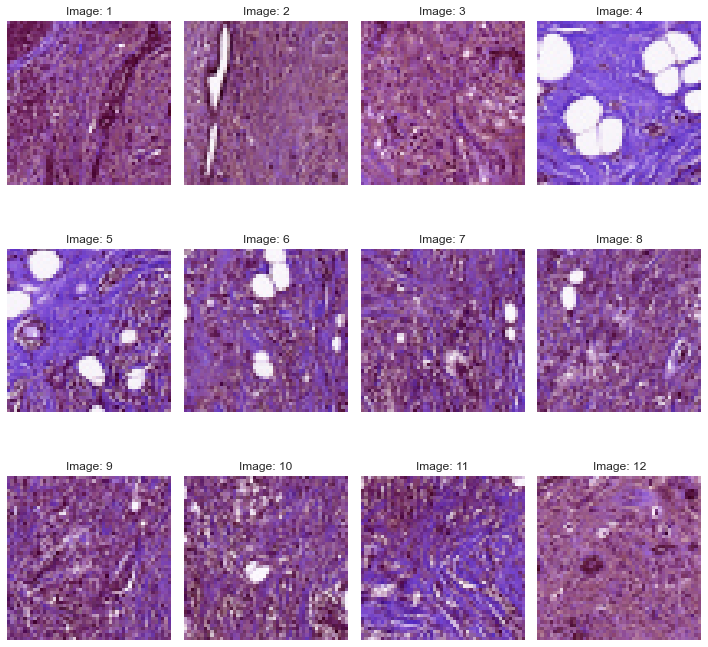

In [102]:
## Visualize few chest x-ray images

displayImages(srt_hr_pneumonia_imgs)

In [104]:
## Load SR Images from directory

sr_pneumonia_imgs = load_data("./dataset used for metric evaluation/SR_1_imgs/", ".png")

directory path:  ./dataset used for metric evaluation/SR_1_imgs/
directories:  ['./dataset used for metric evaluation/SR_1_imgs/']
list of files:  200
list of files path:  200 file path:  ./dataset used for metric evaluation/SR_1_imgs/SR_1.png
Files Read:  200


In [105]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_pneumonia_imgs = OrderedDict(sorted(sr_pneumonia_imgs.items()))

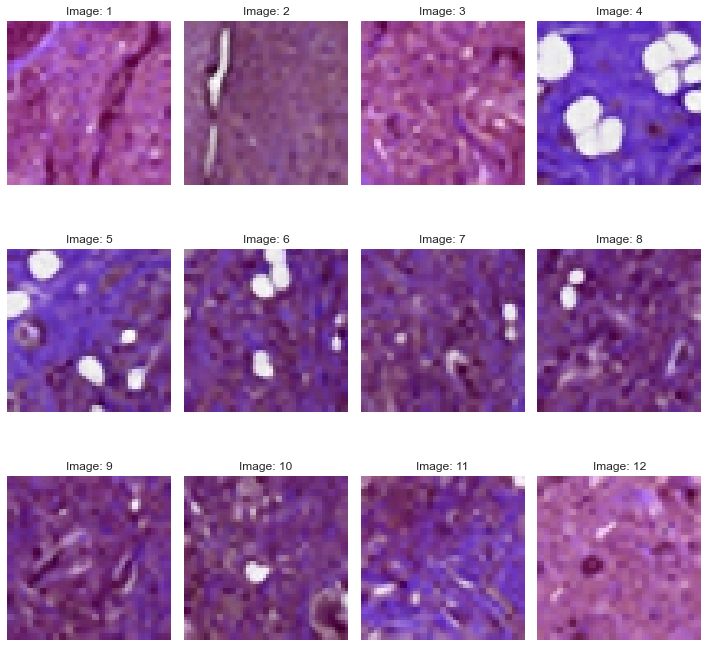

In [106]:
## Visualize few chest x-ray images

displayImages(srt_sr_pneumonia_imgs)

## Metric Calculations for Diseased Images

### SSIM

In [107]:
sewar.full_ref.ssim(srt_sr_pneumonia_imgs[12],srt_hr_pneumonia_imgs[12])[0]

0.6489933531218642

In [109]:
ssim_pneumonia_arr = []
for i in range(1,201):
    ssim_pneumonia_arr.append(sewar.full_ref.ssim(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i])[0])
print(ssim_pneumonia_arr[:10])

[0.6484342494527556, 0.648140641687616, 0.6574386203769262, 0.8126539744134428, 0.7224000938525151, 0.7001441299808584, 0.615846422060598, 0.6797769654201099, 0.6124740723595151, 0.5937083071050248]


In [110]:
ssim_pneumonia_mean, ssim_pneumonia_std = np.mean(ssim_pneumonia_arr), np.std(ssim_pneumonia_arr)
print(ssim_pneumonia_mean, ssim_pneumonia_std)

0.6229787138363375 0.08271717215841624


## Mean Absolute Error (MAE)

In [111]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [112]:
MAE(srt_sr_pneumonia_imgs[2],srt_hr_pneumonia_imgs[2])

0.0002666666666666667

In [114]:
mae_pneumonia_arr = []
for i in range(1,201):
    mae_pneumonia_arr.append(MAE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mae_pneumonia_arr[:10])

[0.0002666666666666667, 0.0002666666666666667, 0.0002666666666666667, 0.007066666666666666, 0.002533333333333333, 0.0005333333333333334, 0.0004, 0.0002666666666666667, 0.0002666666666666667, 0.0004]


In [115]:
mae_pneumonia_mean, mae_pneumonia_std = np.mean(mae_pneumonia_arr), np.std(mae_pneumonia_arr)
print(mae_pneumonia_mean, mae_pneumonia_std)

0.0007133333333333333 0.0011220417896753124


### Mean Absolute Percentage Error (MAPE)

In [116]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [117]:
MPE(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])

0.02666666666666667

In [118]:
mpe_pneumonia_arr = []
for i in range(1,201):
    mpe_pneumonia_arr.append(MPE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mpe_pneumonia_arr[:10])

[0.02666666666666667, 0.02666666666666667, 0.02666666666666667, 0.7066666666666667, 0.2533333333333333, 0.05333333333333334, 0.04, 0.02666666666666667, 0.02666666666666667, 0.04]


In [119]:
mpe_pneumonia_mean, mpe_pneumonia_std = np.mean(mpe_pneumonia_arr), np.std(mpe_pneumonia_arr)
print(mpe_pneumonia_mean, mpe_pneumonia_std)

0.07133333333333333 0.11220417896753122


### Mean Square Error (MSE)

In [120]:
ans = sewar.full_ref.mse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

442.0113333333333 <class 'numpy.float64'>


In [121]:
mse_pneumonia_arr = []
for i in range(1,201):
    mse_pneumonia_arr.append(sewar.full_ref.mse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mse_pneumonia_arr[:10])

[770.7054666666667, 384.15546666666665, 442.0113333333333, 840.8972, 737.5341333333333, 799.9368, 705.8606666666667, 1024.6796, 767.4758666666667, 861.24]


In [122]:
mse_pneumonia_mean, mse_pneumonia_std = np.mean(mse_pneumonia_arr), np.std(mse_pneumonia_arr)
print(mse_pneumonia_mean, mse_pneumonia_std)

731.1954033333334 244.2163479640835


### Root Mean Square Error (RMSE)

In [123]:
ans = sewar.full_ref.rmse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

21.024065575747553 <class 'numpy.float64'>


In [124]:
rmse_pneumonia_arr = []
for i in range(1,201):
    rmse_pneumonia_arr.append(sewar.full_ref.rmse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(rmse_pneumonia_arr[:10])

[27.761582567761995, 19.59988435340032, 21.024065575747553, 28.998227532040644, 27.15757966633502, 28.283153996681488, 26.56803844220846, 32.01061698874297, 27.70335479083114, 29.346890806352896]


In [125]:
rmse_pneumonia_mean, rmse_pneumonia_std = np.mean(rmse_pneumonia_arr), np.std(rmse_pneumonia_arr)
print(rmse_pneumonia_mean, rmse_pneumonia_std)

26.659317581107835 4.525062368958887


### PSNR

In [126]:
ans = sewar.full_ref.psnr(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

21.676469559056358 <class 'numpy.float64'>


In [127]:
psnr_pneumonia_arr = []
for i in range(1,201):
    psnr_pneumonia_arr.append(sewar.full_ref.psnr(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(psnr_pneumonia_arr[:10])

[19.261919213904683, 22.28573343137434, 21.676469559056358, 18.883374544892504, 19.45298236454615, 19.100246844953244, 19.64361378895102, 18.02492270797446, 19.280156329249174, 18.779561685879695]


In [128]:
psnr_pneumonia_mean, psnr_pneumonia_std = np.mean(psnr_pneumonia_arr), np.std(psnr_pneumonia_arr)
print(psnr_pneumonia_mean, psnr_pneumonia_std)

19.74227004855753 1.5073067413970023


### Multi-Scale Structure Similarity Index MS-SSIM

In [129]:
ans = sewar.full_ref.msssim(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

(0.9008204161437819+0j) <class 'numpy.complex128'>


In [130]:
msssim_pneumonia_arr = []
for i in range(1,201):
    msssim_pneumonia_arr.append(sewar.full_ref.msssim(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(msssim_pneumonia_arr[:10])

[(0.8994015942881405+0j), (0.9164565360030245+0j), (0.9008204161437819+0j), (0.960559141933355+0j), (0.9336800346568392+0j), (0.9273326113156886+0j), (0.9117948752247874+0j), (0.9205697457676623+0j), (0.906001020519198+0j), (0.9031860071272513+0j)]


In [131]:
msssim_pneumonia_mean, msssim_pneumonia_std = np.mean(msssim_pneumonia_arr), np.std(msssim_pneumonia_arr)
print(msssim_pneumonia_mean, msssim_pneumonia_std)

(0.8980507714139019+0j) 0.030836733060910098


### Spatial Corelation Coefficient (SCC)

In [132]:
ans = sewar.full_ref.scc(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

0.33588861410097026 <class 'numpy.float64'>


In [133]:
scc_pneumonia_arr = []
for i in range(1,201):
    scc_pneumonia_arr.append(sewar.full_ref.scc(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(scc_pneumonia_arr[:10])

[0.31443707644623287, 0.3974714059407026, 0.33588861410097026, 0.49770793163463223, 0.4115688751580192, 0.39670728176991443, 0.3285203734641817, 0.3612712379416577, 0.3111826356534179, 0.32716376122257024]


In [134]:
scc_pneumonia_mean, scc_pneumonia_std = np.mean(scc_pneumonia_arr), np.std(scc_pneumonia_arr)
print(scc_pneumonia_mean, scc_pneumonia_std)

0.340156065507704 0.0814131079140896


### Pixel Based Visual Information Fidelity (vif-p)

In [136]:
ans = sewar.full_ref.vifp(srt_sr_pneumonia_imgs[10],srt_hr_pneumonia_imgs[10])
print(ans, type(ans))

0.23076452603544606 <class 'numpy.float64'>


In [138]:
vifp_pneumonia_arr = []
for i in range(1,201):
    vifp_pneumonia_arr.append(sewar.full_ref.vifp(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(vifp_pneumonia_arr[:10])

[0.19650400870682452, 0.2635803052953903, 0.18326386289500354, 0.3569063588258068, 0.27513494128414934, 0.2867515327030715, 0.2261580564698359, 0.24350766943766922, 0.20672648284945952, 0.23076452603544606]


In [139]:
vifp_pneumonia_mean, vifp_pneumonia_std = np.mean(vifp_pneumonia_arr), np.std(vifp_pneumonia_arr)
print(vifp_pneumonia_mean, vifp_pneumonia_std)

0.2103029977032199 0.06005269833344337


## Visualizing Error Barplots for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [140]:
## Define error bar plot function

def error_barplot(error_arr,title='', file_name=''):
    
    # Calculate the average
    error_mean = np.mean(error_arr)
    
    # Calculate the standard deviation
    error_std = np.std(error_arr)

    # Define labels, positions, bar heights and error bar heights
    labels = ['For 200 Images']
    x_pos = np.arange(len(labels))
    CTEs = [error_mean]
    error = [error_std]
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x_pos, CTEs,yerr=error,align='center',alpha=0.5,ecolor='black',capsize=10)
#     ax.set_ylabel('Mean Percentage Error')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.yaxis.grid(True)
    
    plt.savefig(f"./BHP Metrics Results/cancer/error_barplot/{file_name}.png")

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()

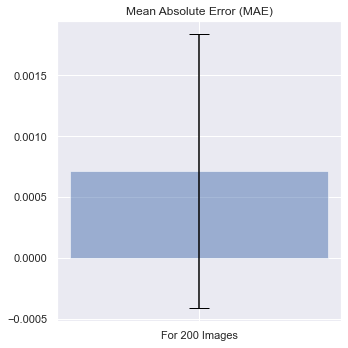

In [141]:
error_barplot(mae_pneumonia_arr,title='Mean Absolute Error (MAE)', file_name='mae_barplot')

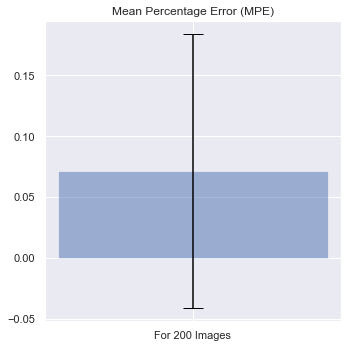

In [142]:
error_barplot(mpe_pneumonia_arr,title='Mean Percentage Error (MPE)', file_name='mpe_barplot')

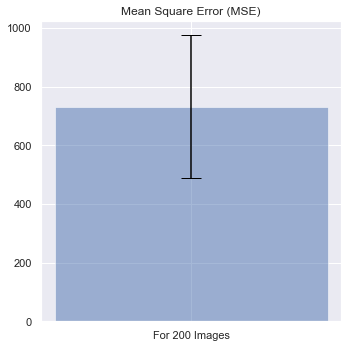

In [145]:
error_barplot(mse_pneumonia_arr,title='Mean Square Error (MSE)', file_name='mse_barplot')

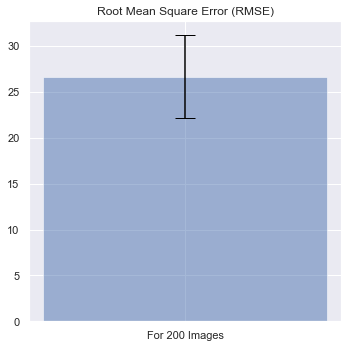

In [146]:
error_barplot(rmse_pneumonia_arr,title='Root Mean Square Error (RMSE)', file_name='rmse_barplot')

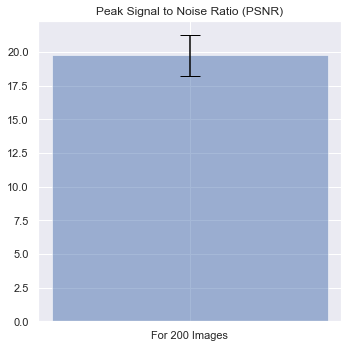

In [147]:
error_barplot(psnr_pneumonia_arr,title='Peak Signal to Noise Ratio (PSNR)', file_name='psnr_barplot')

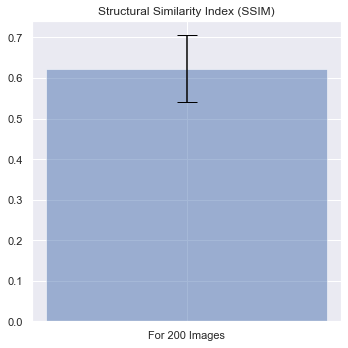

In [148]:
error_barplot(ssim_pneumonia_arr,title='Structural Similarity Index (SSIM)', file_name='ssim_barplot')

C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


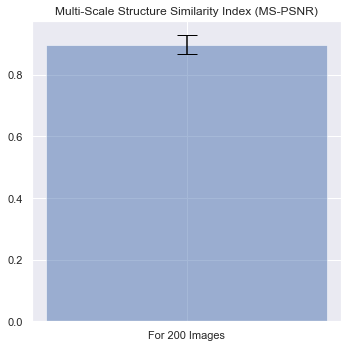

In [149]:
error_barplot(msssim_pneumonia_arr,title='Multi-Scale Structure Similarity Index (MS-PSNR)',file_name='msssim_barplot')

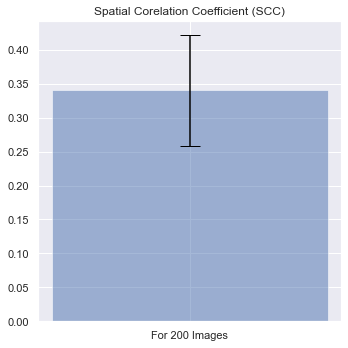

In [150]:
error_barplot(scc_pneumonia_arr,title='Spatial Corelation Coefficient (SCC)', file_name='scc_barplot')

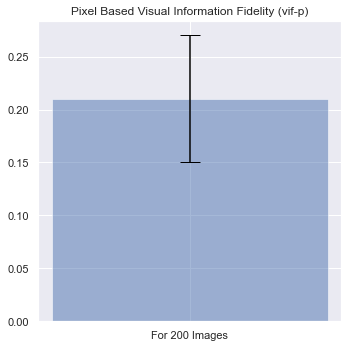

In [151]:
error_barplot(vifp_pneumonia_arr,title='Pixel Based Visual Information Fidelity (vif-p)', file_name='vifp_barplot')

## Scatter Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

In [152]:
metric_dict_pneumonia = {'Images': [i for i in range(1,201)],
            'MAE' : mae_pneumonia_arr,
            'MPE' : mpe_pneumonia_arr,
            'MSE' : mse_pneumonia_arr,
            'RMSE' : rmse_pneumonia_arr,
            'PSNR' : psnr_pneumonia_arr,
            'SSIM' : ssim_pneumonia_arr,
            'MSSSIM' : msssim_pneumonia_arr,
            'SCC' : scc_pneumonia_arr,
            'VIFP' : vifp_pneumonia_arr
         }
metric_df_pneumonia = pd.DataFrame(metric_dict_pneumonia)

In [153]:
def getScatterPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.scatterplot(x=metric_df.Images, y=y_val, data=df, linewidth=2.5).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP Metrics Results/cancer/scatter/{file_name}.png")

In [154]:
def RegPlot(y_val,df,title='', file_name=''):
    
    sns_plt = sns.regplot(x=metric_df.Images, y=y_val, data=df).set_title(title)
    sns_fig = sns_plt.get_figure()
    sns_fig.savefig(f"./BHP Metrics Results/cancer/regression/{file_name}.png")

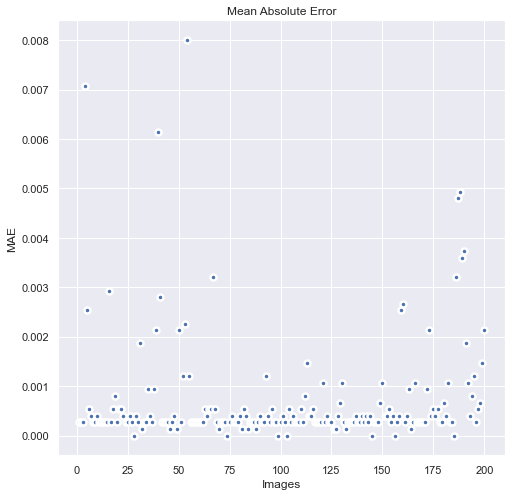

In [155]:
getScatterPlot(metric_df_pneumonia.MAE, metric_df_pneumonia, 'Mean Absolute Error', 'mae_scatter')

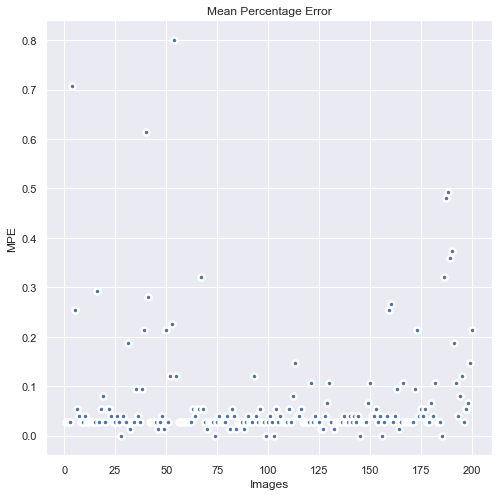

In [156]:
getScatterPlot(metric_df_pneumonia.MPE, metric_df_pneumonia, title='Mean Percentage Error', file_name='mpe_scatter')

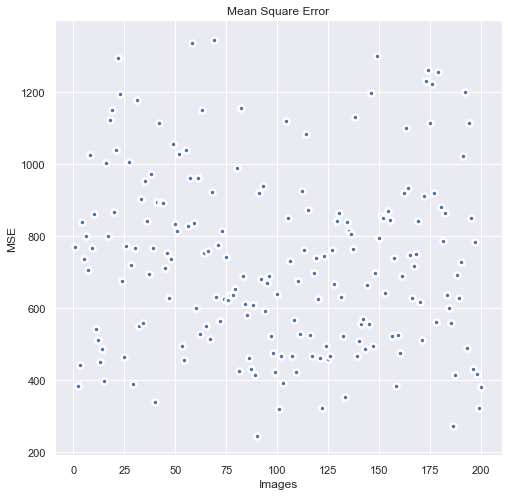

In [157]:
getScatterPlot(metric_df_pneumonia.MSE, metric_df_pneumonia, title='Mean Square Error', file_name='mse_scatter')

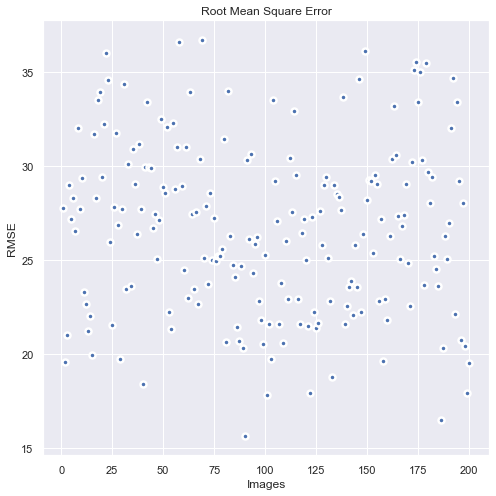

In [158]:
getScatterPlot(metric_df_pneumonia.RMSE, metric_df_pneumonia, title='Root Mean Square Error', file_name='rmse_scatter')

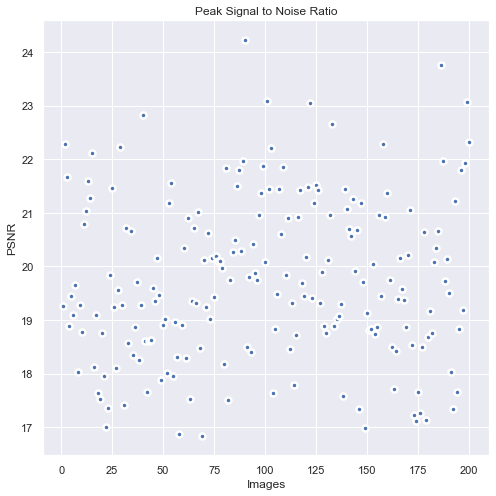

In [159]:
getScatterPlot(metric_df_pneumonia.PSNR, metric_df_pneumonia, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

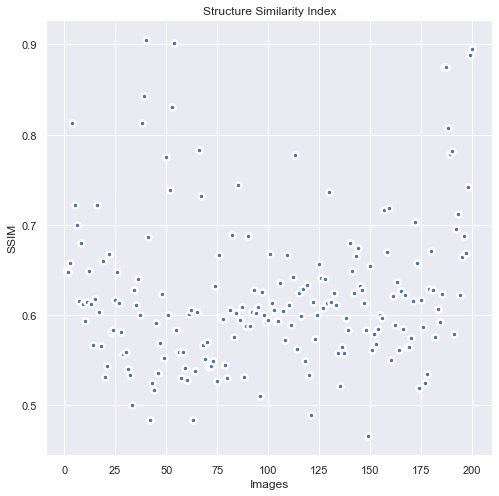

In [160]:
getScatterPlot(metric_df_pneumonia.SSIM, metric_df_pneumonia, title='Structure Similarity Index', file_name='ssim_scatter')

C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


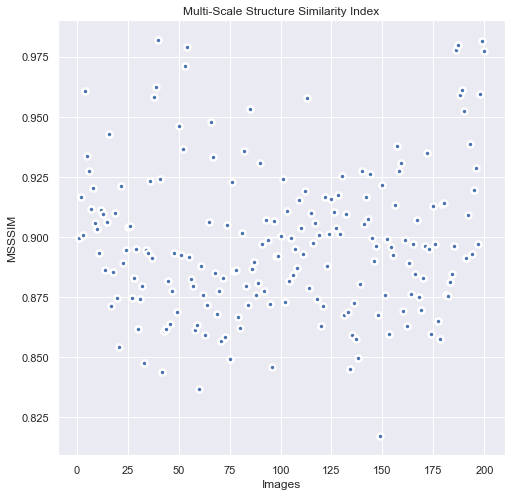

In [161]:
getScatterPlot(metric_df_pneumonia.MSSSIM, metric_df_pneumonia, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

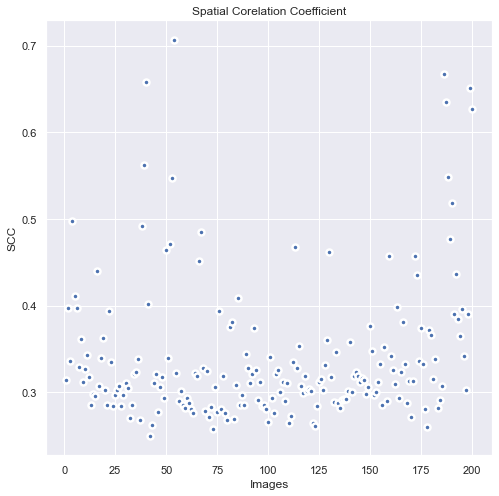

In [162]:
getScatterPlot(metric_df_pneumonia.SCC, metric_df_pneumonia, title='Spatial Corelation Coefficient', file_name='scc_scatter')

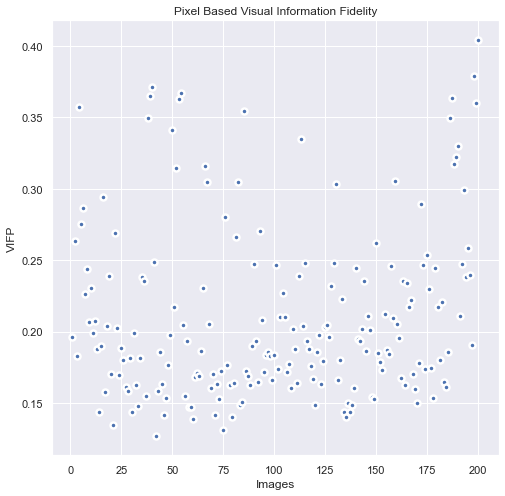

In [163]:
getScatterPlot(metric_df_pneumonia.VIFP, metric_df_pneumonia, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')

### Regression Plot for MAE, MAPE, MSE, RMSE, PSNR, SSIM, MS-SSIM, SCC, and VIF-P

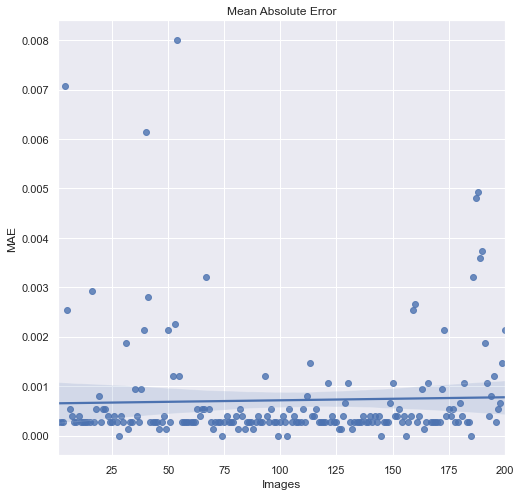

In [164]:
RegPlot(metric_df_pneumonia.MAE, metric_df_pneumonia, 'Mean Absolute Error', 'mae_scatter')

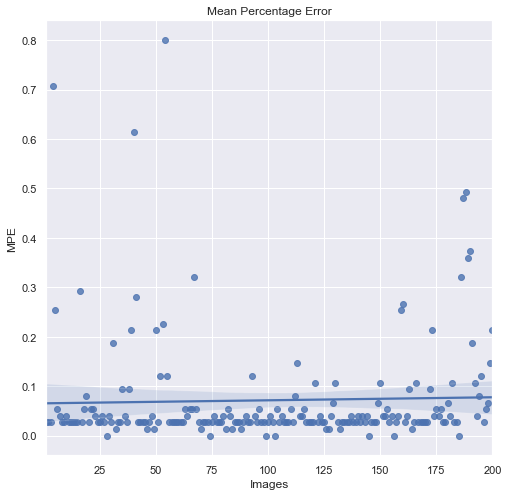

In [165]:
RegPlot(metric_df_pneumonia.MPE, metric_df_pneumonia, title='Mean Percentage Error', file_name='mpe_scatter')

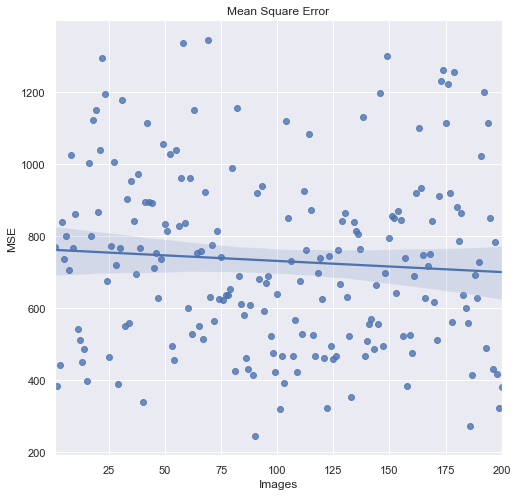

In [166]:
RegPlot(metric_df_pneumonia.MSE, metric_df_pneumonia, title='Mean Square Error', file_name='mse_scatter')

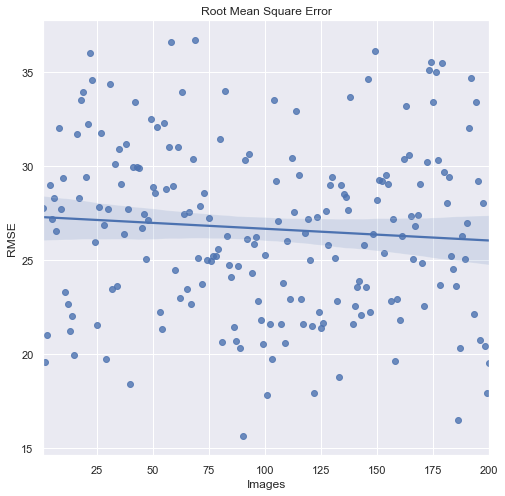

In [167]:
RegPlot(metric_df_pneumonia.RMSE, metric_df_pneumonia, title='Root Mean Square Error', file_name='rmse_scatter')

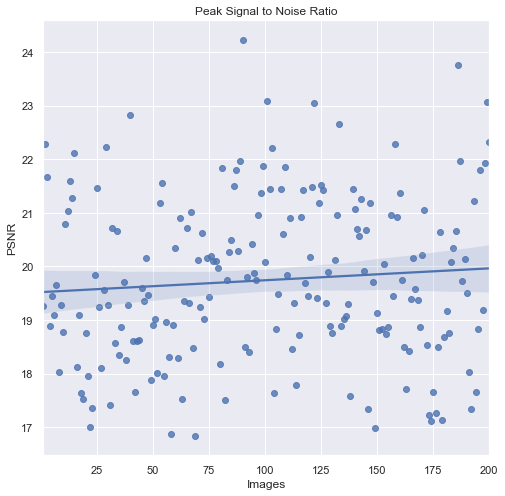

In [168]:
RegPlot(metric_df_pneumonia.PSNR, metric_df_pneumonia, title='Peak Signal to Noise Ratio', file_name='psnr_scatter')

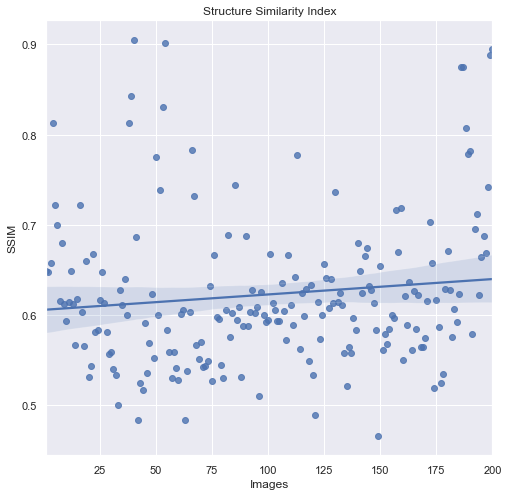

In [169]:
RegPlot(metric_df_pneumonia.SSIM, metric_df_pneumonia, title='Structure Similarity Index', file_name='ssim_scatter')

C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\matplotlib\axes\_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\matplotlib\axes\_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
C:\Users\sharm\anaconda3\envs\srgan\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
C:\Users\sharm\anaconda3\envs\s

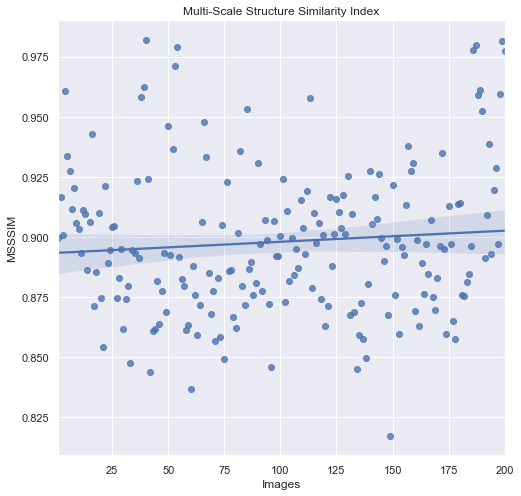

In [170]:
RegPlot(metric_df_pneumonia.MSSSIM, metric_df_pneumonia, title='Multi-Scale Structure Similarity Index', file_name='msssim_scatter')

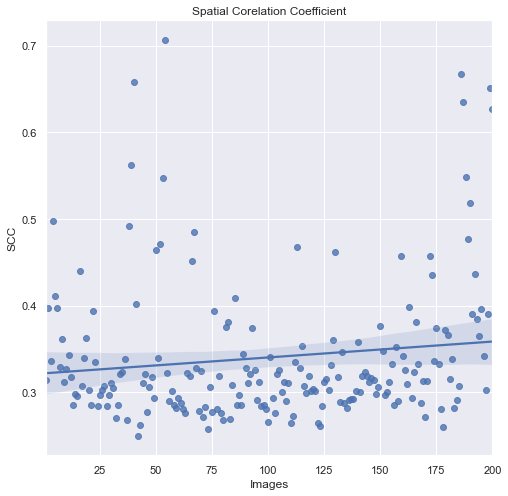

In [171]:
RegPlot(metric_df_pneumonia.SCC, metric_df_pneumonia, title='Spatial Corelation Coefficient', file_name='scc_scatter')

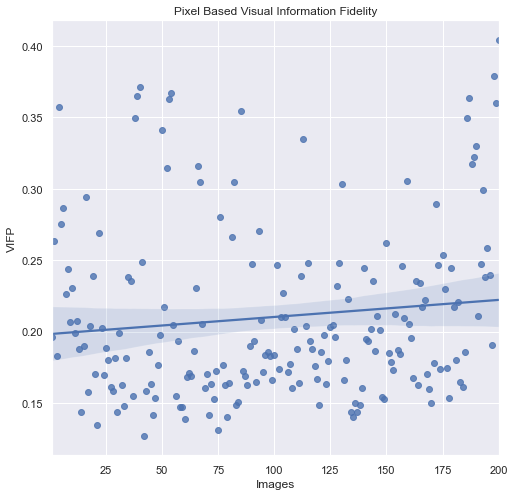

In [172]:
RegPlot(metric_df_pneumonia.VIFP, metric_df_pneumonia, title='Pixel Based Visual Information Fidelity', file_name='vifp_scatter')